Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kai Yee"
COLLABORATORS = ""

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from difflib import get_close_matches
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Shows Dataset

In [3]:
cic_data = pd.read_csv('data/Crime_in_Context.csv')
cic_data = cic_data.dropna()
cic_data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


## What would be the Annual Crime Rate for Boston MA for the Next 10 Years?

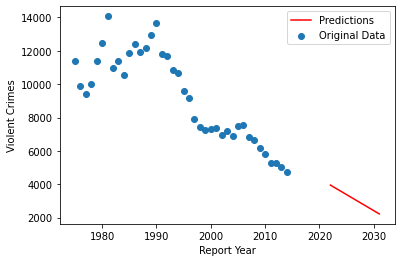

Predicted Violent Crimes for the Next Ten Years:
Year: 2022, Predicted Violent Crimes: 3951.804971857404
Year: 2023, Predicted Violent Crimes: 3759.6578799249255
Year: 2024, Predicted Violent Crimes: 3567.5107879925054
Year: 2025, Predicted Violent Crimes: 3375.363696060027
Year: 2026, Predicted Violent Crimes: 3183.2166041275486
Year: 2027, Predicted Violent Crimes: 2991.0695121951285
Year: 2028, Predicted Violent Crimes: 2798.92242026265
Year: 2029, Predicted Violent Crimes: 2606.7753283301718
Year: 2030, Predicted Violent Crimes: 2414.6282363977516
Year: 2031, Predicted Violent Crimes: 2222.4811444652732


In [4]:
# Prepare the data
boston_data = cic_data[cic_data['agency_jurisdiction'] == 'Boston, MA']
boston_data = boston_data[['report_year', 'violent_crimes']]
boston_data['report_year'] = pd.to_numeric(boston_data['report_year'], errors='coerce')
boston_data['violent_crimes'] = pd.to_numeric(boston_data['violent_crimes'], errors='coerce')

# Flattens data to prepare for ML model
X = boston_data['report_year'].values.reshape(-1, 1)
y = boston_data['violent_crimes'].values

# Choose a model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X, y)

# Generate report years for prediction 2023-2032
future_years = np.arange(boston_data['report_year'].max() + 8, boston_data['report_year'].max() + 18).reshape(-1, 1)

# Predict violent crimes for these years
future_predictions = model.predict(future_years)

# Plot the original data and the predictions
plt.scatter(boston_data['report_year'], boston_data['violent_crimes'], label='Original Data')
plt.plot(future_years, future_predictions, label='Predictions', color='red')
plt.xlabel('Report Year')
plt.ylabel('Violent Crimes')
plt.legend()
plt.show()

# Display the predicted values for each year
print("Predicted Violent Crimes for the Next Ten Years:")
for year, prediction in zip(future_years.flatten(), future_predictions):
    print(f"Year: {int(year)}, Predicted Violent Crimes: {prediction}")

## What Crime would Likely Occur given a City and Time?

### Selection of Cities to choose from

In [5]:
# Lists a Selection of Cities/States to choose from
print('City and State Selections:')
for jurisdiction in cic_data['agency_jurisdiction'].unique():
    print(jurisdiction)

City and State Selections:
Albuquerque, NM
Arlington, TX
Atlanta, GA
Aurora, CO
Austin, TX
Baltimore County, MD
Baltimore, MD
Boston, MA
Buffalo, NY
Charlotte, NC
Chicago, IL
Cincinnati, OH
Cleveland, OH
Columbus, OH
Dallas, TX
Denver, CO
Detroit, MI
El Paso, TX
Fairfax County, VA
Fort Worth, TX
Fresno, CA
Honolulu, HI
Houston, TX
Indianapolis, IN
Jacksonville, FL
Kansas City, MO
Las Vegas, NV
Long Beach, CA
Los Angeles County, CA
Los Angeles, CA
Memphis, TN
Mesa, AZ
Miami-Dade County, FL
Miami, FL
Milwaukee, WI
Minneapolis, MN
Montgomery County, MD
Nashville, TN
Nassau County, NY
New Orleans, LA
New York City, NY
Newark, NJ
Oakland, CA
Oklahoma City, OK
Omaha, NE
Orlando, FL
Philadelphia, PA
Phoenix, AZ
Pittsburgh, PA
Portland, OR
Prince George's County, MD
Raleigh, NC
Sacramento, CA
Salt Lake City, UT
San Antonio, TX
San Diego, CA
San Francisco, CA
San Jose, CA
Seattle, WA
St. Louis, MO
Suffolk County, NY
Tampa, FL
Tucson, AZ
Tulsa, OK
Virginia Beach, VA
Washington, DC
Wichita, KS
Lo

### Expect the following code to take a minute or two to run

In [6]:
# Crime types
crime_types = [
    'homicides',
    'rapes',
    'assaults',
    'robberies'
]    

# Function to perform hyperparameter tuning and return the best model
def tune_svr_hyperparameters(X, y):
    # Define the parameter grid
    param_grid = {
        'C': [80, 100, 120],
        'gamma': [0.1, 1, 3],
        'kernel': ['rbf']
    }

    # Create an SVR model
    svr = SVR()

    # Create GridSearchCV
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the model with data
    grid_search.fit(X, y)
    
    # Return the best model
    return grid_search.best_estimator_

# Creates models representing crime type
def SVR_models(X_string):
    # Initialize var
    svr_models = []
    
    # Extracts data
    X = cic_data[[X_string]].values.reshape(-1, 1)
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train and tests SVR models
    for crime in crime_types:
        y = cic_data[crime].values
        svr_models.append(tune_svr_hyperparameters(X_scaled, y))
        
    return svr_models
        
def predict_crime(svr_models, X_string, corr):
    # Initialize var
    predicted_values = []
    crime_counter = 0
    
    # Extracts data
    X = cic_data[[X_string]].values.reshape(-1, 1)
    
    # Standardize the input corr and predict crime values
    scaler = StandardScaler()
    scaler.fit_transform(X)
    corr = scaler.transform(np.array([[corr]]))
    
    # Train and tests SVR models
    for model in svr_models:
        predicted_value = int(model.predict(corr)[0])
        if predicted_value < 0:
            predicted_value = 0
        predicted_values.append((predicted_value, crime_types[crime_counter]))
        crime_counter += 1
    
    return predicted_values

# Predicts crime order based on year and city/state
def predict_crime_order(city_state, year):
    # Check if the row exists in the dataset
    row_exists = (cic_data['agency_jurisdiction'] == city_state) & (cic_data['report_year'] == year)
    
    if row_exists.any():
        # Obtain the row
        row = cic_data[row_exists]

        # Extract crime values
        crime_values = row[['homicides', 'rapes', 'assaults', 'robberies']].values.flatten()

        # Order crime values from most to least likely
        ordered_crimes = [crime for crime in sorted(zip(crime_values, ['homicides', 'rapes', 'assaults', 'robberies']), reverse=True)]
        
    else:
        # Order predicted crime values from most to least likely
        ordered_crimes = sorted(predict_crime(SVR_models('report_year'),'report_year', year), reverse=True)
        
    # Generate output string
    output_string = f"The crime from most to least likely predicted in the year {year} in {city_state} is "
    output_string += ', '.join([f"{crime} ({count})" for count, crime in ordered_crimes])

    return output_string
    
# Accept user inputs for city/state and year
user_city_state = input("Enter city/state: ")
user_year = int(input("Enter year: "))

# Validate and suggest options if necessary
valid_options = cic_data['agency_jurisdiction'].unique()
while user_city_state not in valid_options:
    suggestions = get_close_matches(user_city_state, valid_options)
    if suggestions:
        print(f"Did you mean one of these? {' | '.join(suggestions)}")
    user_city_state = input("Please enter a valid city/state: ")

# Predict and print the crime order
result = predict_crime_order(user_city_state, user_year)
print(result)

Enter city/state: Boston, MA
Enter year: 2024
The crime from most to least likely predicted in the year 2024 in Boston, MA is assaults (2306), robberies (1957), rapes (316), homicides (72)


## What is the Distribution of Crime given the population number?

### Only run this once

In [7]:
# Compiles models to minimalize prediction runtime
population_models = SVR_models('population')

### Run this for the queries

In [8]:
# Accept population number from the user
population = float(input("Enter the population number: "))

# Predict crime values for the given population
predicted_values = predict_crime(population_models, 'population', population)

# Print the results
print(f"Predicted values for population {population}:")
for predicted_value, crime in predicted_values:
    print(f"{crime.capitalize()}: {predicted_value}")

Enter the population number: 1234567
Predicted values for population 1234567.0:
Homicides: 103
Rapes: 455
Assaults: 4951
Robberies: 4179
